# Calculation of the Structural Decoupling Index for BNI site #

In [1]:
import os
import numpy as np

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/BNI_1_connectomes/'
csv_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
print(f"Number of CSV files in SC directory: {len(csv_files)}\n")

for filename in csv_files:
    filepath = os.path.join(sc_dir, filename)
    try:
        matrix = np.loadtxt(filepath, delimiter=',')
        print(f"{filename}: shape = {matrix.shape}")
    except Exception as e:
        print(f"Failed to read {filename}: {e}")


Number of CSV files in SC directory: 57

29013_parcels.csv: shape = (400, 400)
30150_parcels.csv: shape = (400, 400)
29051_parcels.csv: shape = (400, 400)
29021_parcels.csv: shape = (400, 400)
29044_parcels.csv: shape = (400, 400)
29034_parcels.csv: shape = (400, 400)
29006_parcels.csv: shape = (400, 400)
29028_parcels.csv: shape = (400, 400)
29031_parcels.csv: shape = (400, 400)
29041_parcels.csv: shape = (400, 400)
30149_parcels.csv: shape = (400, 400)
29016_parcels.csv: shape = (400, 400)
29048_parcels.csv: shape = (400, 400)
29038_parcels.csv: shape = (400, 400)
29024_parcels.csv: shape = (400, 400)
29054_parcels.csv: shape = (400, 400)
29009_parcels.csv: shape = (400, 400)
29027_parcels.csv: shape = (400, 400)
29015_parcels.csv: shape = (400, 400)
29032_parcels.csv: shape = (400, 400)
29042_parcels.csv: shape = (400, 400)
30146_parcels.csv: shape = (400, 400)
29019_parcels.csv: shape = (400, 400)
29047_parcels.csv: shape = (400, 400)
29037_parcels.csv: shape = (400, 400)
29052_par

In [2]:
import os
import numpy as np

fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/bni_time_series/schaefer_400/cleaned-1/confounds'

csv_files = []
for root, dirs, files in os.walk(fmri_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print(f"Number of CSV files in fMRI directory (including subfolders): {len(csv_files)}\n")

for filepath in csv_files:
    try:
        matrix = np.loadtxt(filepath, delimiter=',')
        print(f"{os.path.basename(filepath)}: shape = {matrix.shape}")
    except Exception as e:
        print(f"Failed to read {os.path.basename(filepath)}: {e}")


Number of CSV files in fMRI directory (including subfolders): 56

sub-29014_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29051_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29029_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29048_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29030_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29032_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29016_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29053_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-30144_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29036_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29009_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29034_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-30146_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29010_ses-1_task-rest_cleaned-1_bold.csv: shape = (120, 400)
sub-29055_ses-1_task-res

In [3]:
import os

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/BNI_1_connectomes/'
fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/bni_time_series/'

# Get patient IDs from SC files (remove extension)
sc_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
sc_ids = set([os.path.splitext(f)[0] for f in sc_files])

# Get patient IDs from fMRI files recursively (remove extension)
fmri_ids = set()
for root, dirs, files in os.walk(fmri_dir):
    for f in files:
        if f.endswith('.csv'):
            fmri_ids.add(os.path.splitext(f)[0])

missing_in_fmri = sc_ids - fmri_ids
missing_in_sc = fmri_ids - sc_ids

print(f"Patients missing in fMRI data: {missing_in_fmri}")
print(f"Patients missing in SC data: {missing_in_sc}")


Patients missing in fMRI data: {'30149_parcels', '29008_parcels', '29023_parcels', '29026_parcels', '29009_parcels', '29036_parcels', '29043_parcels', '29017_parcels', '29031_parcels', '29035_parcels', '29039_parcels', '29032_parcels', '29030_parcels', '29027_parcels', '29045_parcels', '29051_parcels', '29044_parcels', '29010_parcels', '29022_parcels', '29052_parcels', '29006_parcels', '29050_parcels', '29037_parcels', '29024_parcels', '29028_parcels', '29041_parcels', '29015_parcels', '30144_parcels', '30147_parcels', '29034_parcels', '30146_parcels', '30151_parcels', '29040_parcels', '29054_parcels', '30150_parcels', '29053_parcels', '29055_parcels', '29046_parcels', '29029_parcels', '29042_parcels', '29007_parcels', '29021_parcels', '29020_parcels', '30148_parcels', '29056_parcels', '29011_parcels', '29048_parcels', '29013_parcels', '29047_parcels', '29016_parcels', '29025_parcels', '29019_parcels', '29049_parcels', '29033_parcels', '29018_parcels', '29014_parcels', '29038_parcels'}

In [4]:
import os
import re

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/BNI_1_connectomes/'
fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/bni_time_series/'

def extract_id_sc(filename):
    # Example: '29006_parcels.csv' -> '29006'
    return filename.split('_')[0]

def extract_id_fmri(filename):
    # Example: 'sub-29006_ses-1_task-rest_cleaned-1_bold.csv' -> '29006'
    match = re.search(r'sub-(\d+)', filename)
    if match:
        return match.group(1)
    else:
        return None

sc_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
sc_ids = set(extract_id_sc(f) for f in sc_files)

fmri_ids = set()
for root, dirs, files in os.walk(fmri_dir):
    for f in files:
        if f.endswith('.csv'):
            pid = extract_id_fmri(f)
            if pid:
                fmri_ids.add(pid)

missing_in_fmri = sc_ids - fmri_ids
missing_in_sc = fmri_ids - sc_ids

print(f"Patients missing in fMRI data: {missing_in_fmri}")
print(f"Patients missing in SC data: {missing_in_sc}")


Patients missing in fMRI data: {'30148'}
Patients missing in SC data: {'29012'}


Found 56 patients with matching data.


KeyboardInterrupt: 

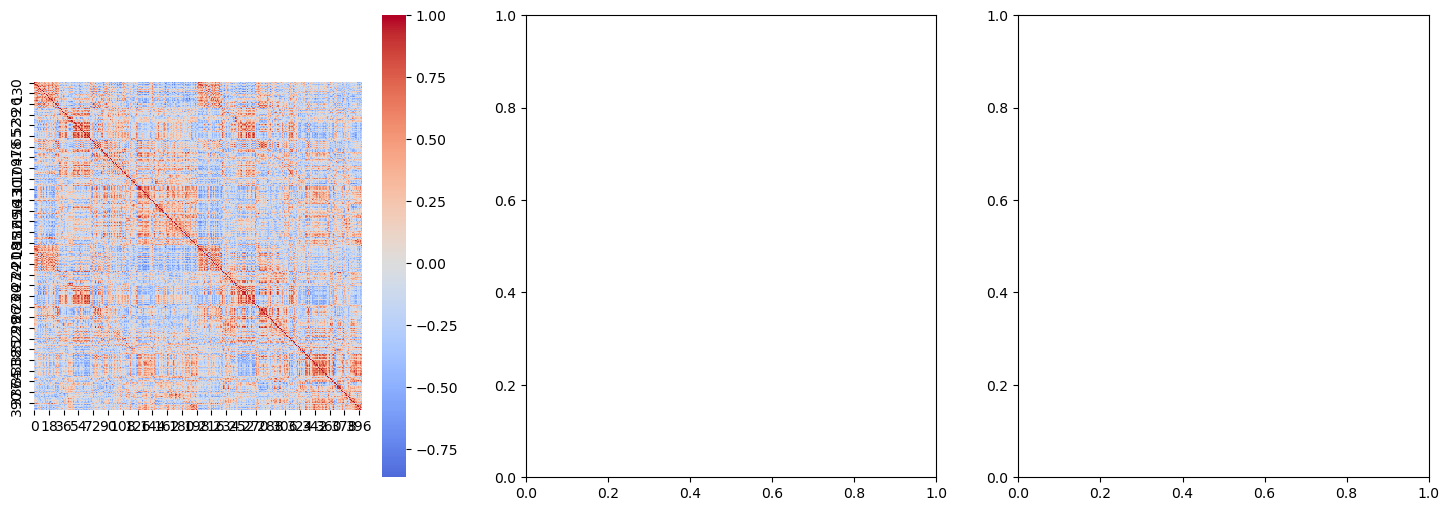

In [5]:
import os
import re
import numpy as np
from scipy.linalg import eigh
import csv
import matplotlib.pyplot as plt
import seaborn as sns

def compute_structural_laplacian(A):
    D = np.diag(np.sum(A, axis=1))
    with np.errstate(divide='ignore'):
        D_inv_sqrt = np.diag(1.0 / np.sqrt(np.sum(A, axis=1)))
    D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0
    L = np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt
    return L

def graph_spectral_phase_randomize(X, eigvecs, seed=None):
    if seed is not None:
        np.random.seed(seed)
    X_hat = X @ eigvecs
    T, N = X_hat.shape
    X_surr = np.zeros_like(X_hat)

    for i in range(N):
        fft_coeff = np.fft.fft(X_hat[:, i])
        mag = np.abs(fft_coeff)
        phase = np.angle(fft_coeff)
        num_phases = len(fft_coeff)

        random_phases = np.random.uniform(0, 2*np.pi, num_phases // 2 - 1)
        new_phase = np.copy(phase)
        new_phase[1:num_phases//2] = random_phases
        new_phase[-(num_phases//2)+1:] = -random_phases[::-1]

        new_fft = mag * np.exp(1j * new_phase)
        X_surr[:, i] = np.fft.ifft(new_fft).real

    return X_surr @ eigvecs.T

def compute_SDI_informed_energy_split(A, X, pid, num_surrogates=100, seed=None):
    X = X - X.mean(axis=0)
    X = X / (X.std(axis=0) + 1e-10)

    T, N = X.shape
    L = compute_structural_laplacian(A)
    eigvals, eigvecs = eigh(L)

    energy = np.sum((X @ eigvecs)**2, axis=0)
    total_energy = np.sum(energy)
    cum_energy = np.cumsum(energy)
    cutoff_index = np.searchsorted(cum_energy, 0.5 * total_energy)
    if cutoff_index <= 0 or cutoff_index >= N:
        cutoff_index = N // 2

    Vlow, Vhigh = eigvecs[:, :cutoff_index], eigvecs[:, cutoff_index:]

    N_c_surr, N_d_surr = np.empty((N, num_surrogates)), np.empty((N, num_surrogates))

    for s in range(num_surrogates):
        X_surr = graph_spectral_phase_randomize(X, eigvecs, seed=seed+s if seed is not None else None)
        X_hat = X_surr @ eigvecs

        X_c = X_hat[:, :cutoff_index] @ Vlow.T
        X_d = X_hat[:, cutoff_index:] @ Vhigh.T

        for r in range(N):
            N_c_surr[r, s] = np.linalg.norm(X_c[:, r])
            N_d_surr[r, s] = np.linalg.norm(X_d[:, r])

    SDI = N_d_surr / (N_c_surr + 1e-10)
    mean_SDI = np.mean(SDI, axis=1)
    print(f"Patient {pid}: SDI mean={mean_SDI.mean():.4f}, cutoff={cutoff_index}")
    return mean_SDI, cutoff_index

def extract_patient_id_structural(filename):
    match = re.match(r'(\d+)_parcels', filename)
    return match.group(1) if match else None

def extract_patient_id_functional(filepath):
    filename = os.path.basename(filepath)
    match = re.search(r'sub-(\d+)_', filename)
    return match.group(1) if match else None

def get_structural_files_map(structural_dir):
    files_map = {}
    for f in os.listdir(structural_dir):
        if f.endswith('.csv'):
            pid = extract_patient_id_structural(f)
            if pid:
                files_map[pid] = os.path.join(structural_dir, f)
    return files_map

def get_functional_files_map(functional_dir):
    files_map = {}
    for root, _, files in os.walk(functional_dir):
        for f in files:
            if f.endswith('.csv'):
                full_path = os.path.join(root, f)
                pid = extract_patient_id_functional(full_path)
                if pid:
                    files_map[pid] = full_path
    return files_map

def plot_fmri_sc(X, A, pid):
    fc_mat = np.corrcoef(X.T)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.heatmap(fc_mat, ax=axes[0], cmap='coolwarm', center=0, square=True, cbar=True)
    axes[0].set_title(f'Patient {pid}: fMRI Functional Connectivity')

    sns.heatmap(A, ax=axes[1], cmap='coolwarm', center=0, square=True, cbar=True)
    axes[1].set_title(f'Patient {pid}: Structural Connectivity')

    diff = fc_mat - A
    sns.heatmap(diff, ax=axes[2], cmap='bwr', center=0, square=True, cbar=True)
    axes[2].set_title(f'Patient {pid}: Difference (FC - SC)')

    plt.tight_layout()
    plt.show()

def main(functional_dir, structural_dir, output_csv_path, num_surrogates=100, seed=42):
    func_files = get_functional_files_map(functional_dir)
    struct_files = get_structural_files_map(structural_dir)

    common_patients = set(func_files.keys()) & set(struct_files.keys())
    print(f"Found {len(common_patients)} patients with matching data.")

    results = []
    cutoff_indices = []
    expected_nodes = 400

    for pid in sorted(common_patients):
        func_path = func_files[pid]
        struct_path = struct_files[pid]

        try:
            X = np.loadtxt(func_path, delimiter=',')
            A = np.loadtxt(struct_path, delimiter=',')

            if X.size == 0 or A.size == 0:
                print(f"Skipping {pid}: empty data")
                continue

            if len(A.shape) != 2 or A.shape[0] != A.shape[1]:
                print(f"Skipping {pid}: Structural matrix not square {A.shape}")
                continue

            if len(X.shape) != 2:
                print(f"Skipping {pid}: Functional data not 2D {X.shape}")
                continue

            T, N_f = X.shape
            N_s = A.shape[0]

            if N_f != N_s:
                print(f"Skipping {pid}: functional nodes != structural nodes ({N_f} vs {N_s})")
                continue

            if N_f != expected_nodes:
                print(f"Skipping {pid}: expected {expected_nodes} nodes, got {N_f}")
                continue

            A = A / (np.max(A) + 1e-10)
            plot_fmri_sc(X, A, pid)

            sdi, cutoff_index = compute_SDI_informed_energy_split(A, X, pid, num_surrogates=num_surrogates, seed=seed)

            # Log transform and normalize to (0,1)
            sdi = np.log2(sdi + 1e-10)
            sdi_min, sdi_max = sdi.min(), sdi.max()
            sdi = (sdi - sdi_min) / (sdi_max - sdi_min + 1e-10)

            if len(sdi) != expected_nodes:
                print(f"Skipping {pid}: SDI length is {len(sdi)}, expected {expected_nodes}.")
                continue

            results.append((pid, sdi))
            cutoff_indices.append(cutoff_index)

        except Exception as e:
            print(f"Error processing {pid}: {e}")

    os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
    with open(output_csv_path, 'w', newline='') as f_out:
        writer = csv.writer(f_out)
        header = ['PatientID'] + [f'SDI_Node_{i+1}' for i in range(expected_nodes)]
        writer.writerow(header)

        for pid, sdi in results:
            writer.writerow([pid] + list(sdi))

    print(f"Saved all SDI results to {output_csv_path}")

    # Plot histogram of energy cutoff indices
    plt.figure(figsize=(8, 5))
    sns.histplot(cutoff_indices, bins=20, kde=False)
    plt.xlabel('Energy-Based Cutoff Index')
    plt.ylabel('Number of Subjects')
    plt.title('Distribution of Graph Frequency Split Points')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    functional_dir = "/Users/arnavkarnik/Documents/AIBD2-Autism/bni_time_series/schaefer_400/cleaned-1"
    structural_dir = "/Users/arnavkarnik/Documents/AIBD2-Autism/BNI_1_connectomes"
    output_csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_bni.csv"

    main(functional_dir, structural_dir, output_csv_path, num_surrogates=100, seed=42)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Path to your SDI results CSV
csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_bni.csv"

# Load SDI data from CSV (skip header)
patient_ids = []
sdi_data = []

with open(csv_path, 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip header
    for row in reader:
        patient_ids.append(row[0])
        sdi_vals = [float(x) if x != '' else np.nan for x in row[1:]]
        sdi_data.append(sdi_vals)

sdi_array = np.array(sdi_data)  # shape: (num_patients, num_nodes)

# Replace empty/nan with np.nan explicitly
sdi_array = np.where(np.isnan(sdi_array), np.nan, sdi_array)

# Plot 1: Histogram of all SDI values across all nodes and patients
plt.figure(figsize=(12,6))
plt.hist(sdi_array[~np.isnan(sdi_array)].flatten(), bins=90, color='c', alpha=0.7)
plt.title("Histogram of all SDI values across all nodes and patients")
plt.xlabel("SDI value")
plt.ylabel("Frequency")
plt.show()

# Plot 2: Mean ± Std Dev of SDI per brain node across patients
mean_sdi = np.nanmean(sdi_array, axis=0)
std_sdi = np.nanstd(sdi_array, axis=0)
nodes = np.arange(1, len(mean_sdi)+1)

plt.figure(figsize=(14,6))
plt.errorbar(nodes, mean_sdi, yerr=std_sdi, fmt='-o', ecolor='r', capsize=5)
plt.title("Mean ± Std Dev of SDI per brain node across patients")
plt.xlabel("Brain node")
plt.ylabel("SDI")
plt.grid(True)
plt.show()

# Plot 3: Distribution of total SDI per patient
total_sdi_per_patient = np.nansum(sdi_array, axis=1)

plt.figure(figsize=(10,5))
plt.hist(total_sdi_per_patient, bins=30, color='m', alpha=0.7)
plt.title("Distribution of total SDI scores across patients")
plt.xlabel("Total SDI")
plt.ylabel("Number of patients")
plt.show()

# Plot 4: Heatmap of SDI for first 5 patients (or less if fewer patients)
# Show only first 5 patients and first 50 nodes
num_patients_to_show = min(5, sdi_array.shape[0])
num_nodes_to_show = min(50, sdi_array.shape[1])

plt.figure(figsize=(12, 4))
sns.heatmap(
    sdi_array[:num_patients_to_show, :num_nodes_to_show],
    cmap='viridis',
    xticklabels=np.arange(1, num_nodes_to_show + 1),
    yticklabels=patient_ids[:num_patients_to_show]
)
plt.title("Zoomed-in SDI heatmap (first 5 patients × first 50 brain nodes)")
plt.xlabel("Brain node")
plt.ylabel("Patient ID")
plt.tight_layout()
plt.show()


start_node = 50
end_node = 150
num_patients_to_show = min(5, sdi_array.shape[0])

plt.figure(figsize=(12, 4))
sns.heatmap(
    sdi_array[:num_patients_to_show, start_node:end_node],
    cmap='viridis',
    xticklabels=np.arange(start_node + 1, end_node + 1),
    yticklabels=patient_ids[:num_patients_to_show]
)
plt.title(f"Zoomed-in SDI heatmap (first 5 patients × nodes {start_node+1}-{end_node})")
plt.xlabel("Brain node")
plt.ylabel("Patient ID")
plt.tight_layout()
plt.show()



# Calculation of the Structural Decoupling Index for IP site #

In [ ]:
import os
import numpy as np

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/IP_1_connectomes/'
csv_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
print(f"Number of CSV files in SC directory: {len(csv_files)}\n")

for filename in csv_files:
    filepath = os.path.join(sc_dir, filename)
    try:
        matrix = np.loadtxt(filepath, delimiter=',')
        print(f"{filename}: shape = {matrix.shape}")
    except Exception as e:
        print(f"Failed to read {filename}: {e}")


In [ ]:
import os
import numpy as np

fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/ip_time_series/schaefer_400/cleaned-1/confounds'

csv_files = []
for root, dirs, files in os.walk(fmri_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print(f"Number of CSV files in fMRI directory (including subfolders): {len(csv_files)}\n")

for filepath in csv_files:
    try:
        matrix = np.loadtxt(filepath, delimiter=',')
        print(f"{os.path.basename(filepath)}: shape = {matrix.shape}")
    except Exception as e:
        print(f"Failed to read {os.path.basename(filepath)}: {e}")


In [ ]:
import os

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/IP_1_connectomes/'
fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/ip_time_series/'

# Get patient IDs from SC files (remove extension)
sc_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
sc_ids = set([os.path.splitext(f)[0] for f in sc_files])

# Get patient IDs from fMRI files recursively (remove extension)
fmri_ids = set()
for root, dirs, files in os.walk(fmri_dir):
    for f in files:
        if f.endswith('.csv'):
            fmri_ids.add(os.path.splitext(f)[0])

missing_in_fmri = sc_ids - fmri_ids
missing_in_sc = fmri_ids - sc_ids

print(f"Patients missing in fMRI data: {missing_in_fmri}")
print(f"Patients missing in SC data: {missing_in_sc}")


In [ ]:
import os
import re

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/ip_1_connectomes/'
fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/ip_time_series/'

def extract_id_sc(filename):
    # Example: '29006_parcels.csv' -> '29006'
    return filename.split('_')[0]

def extract_id_fmri(filename):
    # Example: 'sub-29006_ses-1_task-rest_cleaned-1_bold.csv' -> '29006'
    match = re.search(r'sub-(\d+)', filename)
    if match:
        return match.group(1)
    else:
        return None

sc_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
sc_ids = set(extract_id_sc(f) for f in sc_files)

fmri_ids = set()
for root, dirs, files in os.walk(fmri_dir):
    for f in files:
        if f.endswith('.csv'):
            pid = extract_id_fmri(f)
            if pid:
                fmri_ids.add(pid)

missing_in_fmri = sc_ids - fmri_ids
missing_in_sc = fmri_ids - sc_ids

print(f"Patients missing in fMRI data: {missing_in_fmri}")
print(f"Patients missing in SC data: {missing_in_sc}")


In [ ]:
import os
import re
import numpy as np
from scipy.linalg import eigh
import csv
import matplotlib.pyplot as plt
import seaborn as sns

def compute_structural_laplacian(A):
    D = np.diag(np.sum(A, axis=1))
    with np.errstate(divide='ignore'):
        D_inv_sqrt = np.diag(1.0 / np.sqrt(np.sum(A, axis=1)))
    D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0
    L = np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt
    return L

def graph_spectral_phase_randomize(X, eigvecs, seed=None):
    if seed is not None:
        np.random.seed(seed)
    X_hat = X @ eigvecs
    T, N = X_hat.shape
    X_surr = np.zeros_like(X_hat)

    for i in range(N):
        fft_coeff = np.fft.fft(X_hat[:, i])
        mag = np.abs(fft_coeff)
        phase = np.angle(fft_coeff)
        num_phases = len(fft_coeff)

        random_phases = np.random.uniform(0, 2*np.pi, num_phases // 2 - 1)
        new_phase = np.copy(phase)
        new_phase[1:num_phases//2] = random_phases
        new_phase[-(num_phases//2)+1:] = -random_phases[::-1]

        new_fft = mag * np.exp(1j * new_phase)
        X_surr[:, i] = np.fft.ifft(new_fft).real

    return X_surr @ eigvecs.T

def compute_SDI_informed_energy_split(A, X, pid, num_surrogates=100, seed=None):
    X = X - X.mean(axis=0)
    X = X / (X.std(axis=0) + 1e-10)

    T, N = X.shape
    L = compute_structural_laplacian(A)
    eigvals, eigvecs = eigh(L)

    energy = np.sum((X @ eigvecs)**2, axis=0)
    total_energy = np.sum(energy)
    cum_energy = np.cumsum(energy)
    cutoff_index = np.searchsorted(cum_energy, 0.5 * total_energy)
    if cutoff_index <= 0 or cutoff_index >= N:
        cutoff_index = N // 2

    Vlow, Vhigh = eigvecs[:, :cutoff_index], eigvecs[:, cutoff_index:]

    N_c_surr, N_d_surr = np.empty((N, num_surrogates)), np.empty((N, num_surrogates))

    for s in range(num_surrogates):
        X_surr = graph_spectral_phase_randomize(X, eigvecs, seed=seed+s if seed is not None else None)
        X_hat = X_surr @ eigvecs

        X_c = X_hat[:, :cutoff_index] @ Vlow.T
        X_d = X_hat[:, cutoff_index:] @ Vhigh.T

        for r in range(N):
            N_c_surr[r, s] = np.linalg.norm(X_c[:, r])
            N_d_surr[r, s] = np.linalg.norm(X_d[:, r])

    SDI = N_d_surr / (N_c_surr + 1e-10)
    mean_SDI = np.mean(SDI, axis=1)
    print(f"Patient {pid}: SDI mean={mean_SDI.mean():.4f}, cutoff={cutoff_index}")
    return mean_SDI, cutoff_index

def extract_patient_id_structural(filename):
    match = re.match(r'(\d+)_parcels', filename)
    return match.group(1) if match else None

def extract_patient_id_functional(filepath):
    filename = os.path.basename(filepath)
    match = re.search(r'sub-(\d+)_', filename)
    return match.group(1) if match else None

def get_structural_files_map(structural_dir):
    files_map = {}
    for f in os.listdir(structural_dir):
        if f.endswith('.csv'):
            pid = extract_patient_id_structural(f)
            if pid:
                files_map[pid] = os.path.join(structural_dir, f)
    return files_map

def get_functional_files_map(functional_dir):
    files_map = {}
    for root, _, files in os.walk(functional_dir):
        for f in files:
            if f.endswith('.csv'):
                full_path = os.path.join(root, f)
                pid = extract_patient_id_functional(full_path)
                if pid:
                    files_map[pid] = full_path
    return files_map

def plot_fmri_sc(X, A, pid):
    fc_mat = np.corrcoef(X.T)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.heatmap(fc_mat, ax=axes[0], cmap='coolwarm', center=0, square=True, cbar=True)
    axes[0].set_title(f'Patient {pid}: fMRI Functional Connectivity')

    sns.heatmap(A, ax=axes[1], cmap='coolwarm', center=0, square=True, cbar=True)
    axes[1].set_title(f'Patient {pid}: Structural Connectivity')

    diff = fc_mat - A
    sns.heatmap(diff, ax=axes[2], cmap='bwr', center=0, square=True, cbar=True)
    axes[2].set_title(f'Patient {pid}: Difference (FC - SC)')

    plt.tight_layout()
    plt.show()

def main(functional_dir, structural_dir, output_csv_path, num_surrogates=100, seed=42):
    func_files = get_functional_files_map(functional_dir)
    struct_files = get_structural_files_map(structural_dir)

    common_patients = set(func_files.keys()) & set(struct_files.keys())
    print(f"Found {len(common_patients)} patients with matching data.")

    results = []
    cutoff_indices = []
    max_nodes = 0

    for pid in sorted(common_patients):
        func_path = func_files[pid]
        struct_path = struct_files[pid]

        try:
            X = np.loadtxt(func_path, delimiter=',')
            A = np.loadtxt(struct_path, delimiter=',')

            if X.size == 0 or A.size == 0:
                print(f"Skipping {pid}: empty data")
                continue

            if len(A.shape) != 2 or A.shape[0] != A.shape[1]:
                print(f"Skipping {pid}: Structural matrix not square {A.shape}")
                continue

            if len(X.shape) != 2:
                print(f"Skipping {pid}: Functional data not 2D {X.shape}")
                continue

            T, N_f = X.shape
            N_s = A.shape[0]

            if N_f != N_s:
                print(f"Skipping {pid}: functional nodes != structural nodes ({N_f} vs {N_s})")
                continue

            A = A / (np.max(A) + 1e-10)
            plot_fmri_sc(X, A, pid)

            sdi, cutoff_index = compute_SDI_informed_energy_split(A, X, pid, num_surrogates=num_surrogates, seed=seed)

            # Log transform and normalize to (0,1)
            sdi = np.log2(sdi + 1e-10)
            sdi_min, sdi_max = sdi.min(), sdi.max()
            sdi = (sdi - sdi_min) / (sdi_max - sdi_min + 1e-10)

            results.append((pid, sdi))
            cutoff_indices.append(cutoff_index)
            max_nodes = max(max_nodes, len(sdi))

        except Exception as e:
            print(f"Error processing {pid}: {e}")

    os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
    with open(output_csv_path, 'w', newline='') as f_out:
        writer = csv.writer(f_out)
        header = ['PatientID'] + [f'SDI_Node_{i+1}' for i in range(max_nodes)]
        writer.writerow(header)

        for pid, sdi in results:
            row = [pid] + list(sdi) + [np.nan]*(max_nodes - len(sdi))
            writer.writerow(row)

    print(f"Saved all SDI results to {output_csv_path}")

    # Plot histogram of energy cutoff indices
    plt.figure(figsize=(8, 5))
    sns.histplot(cutoff_indices, bins=20, kde=False)
    plt.xlabel('Energy-Based Cutoff Index')
    plt.ylabel('Number of Subjects')
    plt.title('Distribution of Graph Frequency Split Points')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    functional_dir = "/Users/arnavkarnik/Documents/AIBD2-Autism/ip_time_series/schaefer_400/cleaned-1"
    structural_dir = "/Users/arnavkarnik/Documents/AIBD2-Autism/IP_1_connectomes"
    output_csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_ip.csv"

    main(functional_dir, structural_dir, output_csv_path, num_surrogates=100, seed=42)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Path to your SDI results CSV
csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_ip.csv"

# Load SDI data from CSV (skip header)
patient_ids = []
sdi_data = []

with open(csv_path, 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip header
    for row in reader:
        patient_ids.append(row[0])
        sdi_vals = [float(x) if x != '' else np.nan for x in row[1:]]
        sdi_data.append(sdi_vals)

sdi_array = np.array(sdi_data)  # shape: (num_patients, num_nodes)

# Replace empty/nan with np.nan explicitly
sdi_array = np.where(np.isnan(sdi_array), np.nan, sdi_array)

# Plot 1: Histogram of all SDI values across all nodes and patients
plt.figure(figsize=(12,6))
plt.hist(sdi_array[~np.isnan(sdi_array)].flatten(), bins=90, color='c', alpha=0.7)
plt.title("Histogram of all SDI values across all nodes and patients")
plt.xlabel("SDI value")
plt.ylabel("Frequency")
plt.show()

# Plot 2: Mean ± Std Dev of SDI per brain node across patients
mean_sdi = np.nanmean(sdi_array, axis=0)
std_sdi = np.nanstd(sdi_array, axis=0)
nodes = np.arange(1, len(mean_sdi)+1)

plt.figure(figsize=(14,6))
plt.errorbar(nodes, mean_sdi, yerr=std_sdi, fmt='-o', ecolor='r', capsize=5)
plt.title("Mean ± Std Dev of SDI per brain node across patients")
plt.xlabel("Brain node")
plt.ylabel("SDI")
plt.grid(True)
plt.show()

# Plot 3: Distribution of total SDI per patient
total_sdi_per_patient = np.nansum(sdi_array, axis=1)

plt.figure(figsize=(10,5))
plt.hist(total_sdi_per_patient, bins=30, color='m', alpha=0.7)
plt.title("Distribution of total SDI scores across patients")
plt.xlabel("Total SDI")
plt.ylabel("Number of patients")
plt.show()

# Plot 4: Heatmap of SDI for first 5 patients (or less if fewer patients)
# Show only first 5 patients and first 50 nodes
num_patients_to_show = min(5, sdi_array.shape[0])
num_nodes_to_show = min(50, sdi_array.shape[1])

plt.figure(figsize=(12, 4))
sns.heatmap(
    sdi_array[:num_patients_to_show, :num_nodes_to_show],
    cmap='viridis',
    xticklabels=np.arange(1, num_nodes_to_show + 1),
    yticklabels=patient_ids[:num_patients_to_show]
)
plt.title("Zoomed-in SDI heatmap (first 5 patients × first 50 brain nodes)")
plt.xlabel("Brain node")
plt.ylabel("Patient ID")
plt.tight_layout()
plt.show()


start_node = 50
end_node = 150
num_patients_to_show = min(5, sdi_array.shape[0])

plt.figure(figsize=(12, 4))
sns.heatmap(
    sdi_array[:num_patients_to_show, start_node:end_node],
    cmap='viridis',
    xticklabels=np.arange(start_node + 1, end_node + 1),
    yticklabels=patient_ids[:num_patients_to_show]
)
plt.title(f"Zoomed-in SDI heatmap (first 5 patients × nodes {start_node+1}-{end_node})")
plt.xlabel("Brain node")
plt.ylabel("Patient ID")
plt.tight_layout()
plt.show()



# Calculation of the Structural Decoupling Index for SDSU site #

In [ ]:
import os
import numpy as np

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/SDSU_1_connectomes/'
csv_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
print(f"Number of CSV files in SC directory: {len(csv_files)}\n")

for filename in csv_files:
    filepath = os.path.join(sc_dir, filename)
    try:
        matrix = np.loadtxt(filepath, delimiter=',')
        print(f"{filename}: shape = {matrix.shape}")
    except Exception as e:
        print(f"Failed to read {filename}: {e}")


In [ ]:
import os
import numpy as np

fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/sdsu_time_series/schaefer_400/cleaned-1/confounds'

csv_files = []
for root, dirs, files in os.walk(fmri_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print(f"Number of CSV files in fMRI directory (including subfolders): {len(csv_files)}\n")

for filepath in csv_files:
    try:
        matrix = np.loadtxt(filepath, delimiter=',')
        print(f"{os.path.basename(filepath)}: shape = {matrix.shape}")
    except Exception as e:
        print(f"Failed to read {os.path.basename(filepath)}: {e}")


In [ ]:
import os

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/SDSU_1_connectomes/'
fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/sdsu_time_series/'

# Get patient IDs from SC files (remove extension)
sc_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
sc_ids = set([os.path.splitext(f)[0] for f in sc_files])

# Get patient IDs from fMRI files recursively (remove extension)
fmri_ids = set()
for root, dirs, files in os.walk(fmri_dir):
    for f in files:
        if f.endswith('.csv'):
            fmri_ids.add(os.path.splitext(f)[0])

missing_in_fmri = sc_ids - fmri_ids
missing_in_sc = fmri_ids - sc_ids

print(f"Patients missing in fMRI data: {missing_in_fmri}")
print(f"Patients missing in SC data: {missing_in_sc}")


In [ ]:
import os
import re

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/SDSU_1_connectomes/'
fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/sdsu_time_series/'

def extract_id_sc(filename):
    # Example: '29006_parcels.csv' -> '29006'
    return filename.split('_')[0]

def extract_id_fmri(filename):
    # Example: 'sub-29006_ses-1_task-rest_cleaned-1_bold.csv' -> '29006'
    match = re.search(r'sub-(\d+)', filename)
    if match:
        return match.group(1)
    else:
        return None

sc_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
sc_ids = set(extract_id_sc(f) for f in sc_files)

fmri_ids = set()
for root, dirs, files in os.walk(fmri_dir):
    for f in files:
        if f.endswith('.csv'):
            pid = extract_id_fmri(f)
            if pid:
                fmri_ids.add(pid)

missing_in_fmri = sc_ids - fmri_ids
missing_in_sc = fmri_ids - sc_ids

print(f"Patients missing in fMRI data: {missing_in_fmri}")
print(f"Patients missing in SC data: {missing_in_sc}")


In [ ]:
import os
import re
import numpy as np
from scipy.linalg import eigh
import csv
import matplotlib.pyplot as plt
import seaborn as sns

def compute_structural_laplacian(A):
    D = np.diag(np.sum(A, axis=1))
    with np.errstate(divide='ignore'):
        D_inv_sqrt = np.diag(1.0 / np.sqrt(np.sum(A, axis=1)))
    D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0
    L = np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt
    return L

def graph_spectral_phase_randomize(X, eigvecs, seed=None):
    if seed is not None:
        np.random.seed(seed)
    X_hat = X @ eigvecs
    T, N = X_hat.shape
    X_surr = np.zeros_like(X_hat)

    for i in range(N):
        fft_coeff = np.fft.fft(X_hat[:, i])
        mag = np.abs(fft_coeff)
        phase = np.angle(fft_coeff)
        num_phases = len(fft_coeff)

        random_phases = np.random.uniform(0, 2*np.pi, num_phases // 2 - 1)
        new_phase = np.copy(phase)
        new_phase[1:num_phases//2] = random_phases
        new_phase[-(num_phases//2)+1:] = -random_phases[::-1]

        new_fft = mag * np.exp(1j * new_phase)
        X_surr[:, i] = np.fft.ifft(new_fft).real

    return X_surr @ eigvecs.T

def compute_SDI_informed_energy_split(A, X, pid, num_surrogates=100, seed=None):
    X = X - X.mean(axis=0)
    X = X / (X.std(axis=0) + 1e-10)

    T, N = X.shape
    L = compute_structural_laplacian(A)
    eigvals, eigvecs = eigh(L)

    energy = np.sum((X @ eigvecs)**2, axis=0)
    total_energy = np.sum(energy)
    cum_energy = np.cumsum(energy)
    cutoff_index = np.searchsorted(cum_energy, 0.5 * total_energy)
    if cutoff_index <= 0 or cutoff_index >= N:
        cutoff_index = N // 2

    Vlow, Vhigh = eigvecs[:, :cutoff_index], eigvecs[:, cutoff_index:]

    N_c_surr, N_d_surr = np.empty((N, num_surrogates)), np.empty((N, num_surrogates))

    for s in range(num_surrogates):
        X_surr = graph_spectral_phase_randomize(X, eigvecs, seed=seed+s if seed is not None else None)
        X_hat = X_surr @ eigvecs

        X_c = X_hat[:, :cutoff_index] @ Vlow.T
        X_d = X_hat[:, cutoff_index:] @ Vhigh.T

        for r in range(N):
            N_c_surr[r, s] = np.linalg.norm(X_c[:, r])
            N_d_surr[r, s] = np.linalg.norm(X_d[:, r])

    SDI = N_d_surr / (N_c_surr + 1e-10)
    mean_SDI = np.mean(SDI, axis=1)
    print(f"Patient {pid}: SDI mean={mean_SDI.mean():.4f}, cutoff={cutoff_index}")
    return mean_SDI, cutoff_index

def extract_patient_id_structural(filename):
    match = re.match(r'(\d+)_parcels', filename)
    return match.group(1) if match else None

def extract_patient_id_functional(filepath):
    filename = os.path.basename(filepath)
    match = re.search(r'sub-(\d+)_', filename)
    return match.group(1) if match else None

def get_structural_files_map(structural_dir):
    files_map = {}
    for f in os.listdir(structural_dir):
        if f.endswith('.csv'):
            pid = extract_patient_id_structural(f)
            if pid:
                files_map[pid] = os.path.join(structural_dir, f)
    return files_map

def get_functional_files_map(functional_dir):
    files_map = {}
    for root, _, files in os.walk(functional_dir):
        for f in files:
            if f.endswith('.csv'):
                full_path = os.path.join(root, f)
                pid = extract_patient_id_functional(full_path)
                if pid:
                    files_map[pid] = full_path
    return files_map

def plot_fmri_sc(X, A, pid):
    fc_mat = np.corrcoef(X.T)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.heatmap(fc_mat, ax=axes[0], cmap='coolwarm', center=0, square=True, cbar=True)
    axes[0].set_title(f'Patient {pid}: fMRI Functional Connectivity')

    sns.heatmap(A, ax=axes[1], cmap='coolwarm', center=0, square=True, cbar=True)
    axes[1].set_title(f'Patient {pid}: Structural Connectivity')

    diff = fc_mat - A
    sns.heatmap(diff, ax=axes[2], cmap='bwr', center=0, square=True, cbar=True)
    axes[2].set_title(f'Patient {pid}: Difference (FC - SC)')

    plt.tight_layout()
    plt.show()

def main(functional_dir, structural_dir, output_csv_path, num_surrogates=100, seed=42):
    func_files = get_functional_files_map(functional_dir)
    struct_files = get_structural_files_map(structural_dir)

    common_patients = set(func_files.keys()) & set(struct_files.keys())
    print(f"Found {len(common_patients)} patients with matching data.")

    results = []
    cutoff_indices = []
    max_nodes = 0

    for pid in sorted(common_patients):
        func_path = func_files[pid]
        struct_path = struct_files[pid]

        try:
            X = np.loadtxt(func_path, delimiter=',')
            A = np.loadtxt(struct_path, delimiter=',')

            if X.size == 0 or A.size == 0:
                print(f"Skipping {pid}: empty data")
                continue

            if len(A.shape) != 2 or A.shape[0] != A.shape[1]:
                print(f"Skipping {pid}: Structural matrix not square {A.shape}")
                continue

            if len(X.shape) != 2:
                print(f"Skipping {pid}: Functional data not 2D {X.shape}")
                continue

            T, N_f = X.shape
            N_s = A.shape[0]

            if N_f != N_s:
                print(f"Skipping {pid}: functional nodes != structural nodes ({N_f} vs {N_s})")
                continue

            A = A / (np.max(A) + 1e-10)
            plot_fmri_sc(X, A, pid)

            sdi, cutoff_index = compute_SDI_informed_energy_split(A, X, pid, num_surrogates=num_surrogates, seed=seed)

            # Log transform and normalize to (0,1)
            sdi = np.log2(sdi + 1e-10)
            sdi_min, sdi_max = sdi.min(), sdi.max()
            sdi = (sdi - sdi_min) / (sdi_max - sdi_min + 1e-10)

            results.append((pid, sdi))
            cutoff_indices.append(cutoff_index)
            max_nodes = max(max_nodes, len(sdi))

        except Exception as e:
            print(f"Error processing {pid}: {e}")

    os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
    with open(output_csv_path, 'w', newline='') as f_out:
        writer = csv.writer(f_out)
        header = ['PatientID'] + [f'SDI_Node_{i+1}' for i in range(max_nodes)]
        writer.writerow(header)

        for pid, sdi in results:
            row = [pid] + list(sdi) + [np.nan]*(max_nodes - len(sdi))
            writer.writerow(row)

    print(f"Saved all SDI results to {output_csv_path}")

    # Plot histogram of energy cutoff indices
    plt.figure(figsize=(8, 5))
    sns.histplot(cutoff_indices, bins=20, kde=False)
    plt.xlabel('Energy-Based Cutoff Index')
    plt.ylabel('Number of Subjects')
    plt.title('Distribution of Graph Frequency Split Points')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    functional_dir = "/Users/arnavkarnik/Documents/AIBD2-Autism/sdsu_time_series/schaefer_400/cleaned-1"
    structural_dir = "/Users/arnavkarnik/Documents/AIBD2-Autism/SDSU_1_connectomes"
    output_csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_sdsu.csv"

    main(functional_dir, structural_dir, output_csv_path, num_surrogates=100, seed=42)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Path to your SDI results CSV
csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_sdsu.csv"

# Load SDI data from CSV (skip header)
patient_ids = []
sdi_data = []

with open(csv_path, 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip header
    for row in reader:
        patient_ids.append(row[0])
        sdi_vals = [float(x) if x != '' else np.nan for x in row[1:]]
        sdi_data.append(sdi_vals)

sdi_array = np.array(sdi_data)  # shape: (num_patients, num_nodes)

# Replace empty/nan with np.nan explicitly
sdi_array = np.where(np.isnan(sdi_array), np.nan, sdi_array)

# Plot 1: Histogram of all SDI values across all nodes and patients
plt.figure(figsize=(12,6))
plt.hist(sdi_array[~np.isnan(sdi_array)].flatten(), bins=90, color='c', alpha=0.7)
plt.title("Histogram of all SDI values across all nodes and patients")
plt.xlabel("SDI value")
plt.ylabel("Frequency")
plt.show()

# Plot 2: Mean ± Std Dev of SDI per brain node across patients
mean_sdi = np.nanmean(sdi_array, axis=0)
std_sdi = np.nanstd(sdi_array, axis=0)
nodes = np.arange(1, len(mean_sdi)+1)

plt.figure(figsize=(14,6))
plt.errorbar(nodes, mean_sdi, yerr=std_sdi, fmt='-o', ecolor='r', capsize=5)
plt.title("Mean ± Std Dev of SDI per brain node across patients")
plt.xlabel("Brain node")
plt.ylabel("SDI")
plt.grid(True)
plt.show()

# Plot 3: Distribution of total SDI per patient
total_sdi_per_patient = np.nansum(sdi_array, axis=1)

plt.figure(figsize=(10,5))
plt.hist(total_sdi_per_patient, bins=30, color='m', alpha=0.7)
plt.title("Distribution of total SDI scores across patients")
plt.xlabel("Total SDI")
plt.ylabel("Number of patients")
plt.show()

# Plot 4: Heatmap of SDI for first 5 patients (or less if fewer patients)
# Show only first 5 patients and first 50 nodes
num_patients_to_show = min(5, sdi_array.shape[0])
num_nodes_to_show = min(50, sdi_array.shape[1])

plt.figure(figsize=(12, 4))
sns.heatmap(
    sdi_array[:num_patients_to_show, :num_nodes_to_show],
    cmap='viridis',
    xticklabels=np.arange(1, num_nodes_to_show + 1),
    yticklabels=patient_ids[:num_patients_to_show]
)
plt.title("Zoomed-in SDI heatmap (first 5 patients × first 50 brain nodes)")
plt.xlabel("Brain node")
plt.ylabel("Patient ID")
plt.tight_layout()
plt.show()


start_node = 50
end_node = 150
num_patients_to_show = min(5, sdi_array.shape[0])

plt.figure(figsize=(12, 4))
sns.heatmap(
    sdi_array[:num_patients_to_show, start_node:end_node],
    cmap='viridis',
    xticklabels=np.arange(start_node + 1, end_node + 1),
    yticklabels=patient_ids[:num_patients_to_show]
)
plt.title(f"Zoomed-in SDI heatmap (first 5 patients × nodes {start_node+1}-{end_node})")
plt.xlabel("Brain node")
plt.ylabel("Patient ID")
plt.tight_layout()
plt.show()



# Calculation of the Structural Decoupling Index for NYU1 site #

In [ ]:
import os
import numpy as np

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/NYU_1_connectomes/'
csv_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
print(f"Number of CSV files in SC directory: {len(csv_files)}\n")

for filename in csv_files:
    filepath = os.path.join(sc_dir, filename)
    try:
        matrix = np.loadtxt(filepath, delimiter=',')
        print(f"{filename}: shape = {matrix.shape}")
    except Exception as e:
        print(f"Failed to read {filename}: {e}")


In [ ]:
import os
import numpy as np

fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/nyu1_time_series/schaefer_400/cleaned-1/confounds'

csv_files = []
for root, dirs, files in os.walk(fmri_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print(f"Number of CSV files in fMRI directory (including subfolders): {len(csv_files)}\n")

for filepath in csv_files:
    try:
        matrix = np.loadtxt(filepath, delimiter=',')
        print(f"{os.path.basename(filepath)}: shape = {matrix.shape}")
    except Exception as e:
        print(f"Failed to read {os.path.basename(filepath)}: {e}")


In [ ]:
import os

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/NYU_1_connectomes/'
fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/nyu1_time_series/'

# Get patient IDs from SC files (remove extension)
sc_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
sc_ids = set([os.path.splitext(f)[0] for f in sc_files])

# Get patient IDs from fMRI files recursively (remove extension)
fmri_ids = set()
for root, dirs, files in os.walk(fmri_dir):
    for f in files:
        if f.endswith('.csv'):
            fmri_ids.add(os.path.splitext(f)[0])

missing_in_fmri = sc_ids - fmri_ids
missing_in_sc = fmri_ids - sc_ids

print(f"Patients missing in fMRI data: {missing_in_fmri}")
print(f"Patients missing in SC data: {missing_in_sc}")


In [ ]:
import os
import re

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/NYU_1_connectomes/'
fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/nyu1_time_series/'

def extract_id_sc(filename):
    # Example: '29006_parcels.csv' -> '29006'
    return filename.split('_')[0]

def extract_id_fmri(filename):
    # Example: 'sub-29006_ses-1_task-rest_cleaned-1_bold.csv' -> '29006'
    match = re.search(r'sub-(\d+)', filename)
    if match:
        return match.group(1)
    else:
        return None

sc_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
sc_ids = set(extract_id_sc(f) for f in sc_files)

fmri_ids = set()
for root, dirs, files in os.walk(fmri_dir):
    for f in files:
        if f.endswith('.csv'):
            pid = extract_id_fmri(f)
            if pid:
                fmri_ids.add(pid)

missing_in_fmri = sc_ids - fmri_ids
missing_in_sc = fmri_ids - sc_ids

print(f"Patients missing in fMRI data: {missing_in_fmri}")
print(f"Patients missing in SC data: {missing_in_sc}")


In [ ]:
import os
import re
import numpy as np
from scipy.linalg import eigh
import csv
import matplotlib.pyplot as plt
import seaborn as sns

def compute_structural_laplacian(A):
    D = np.diag(np.sum(A, axis=1))
    with np.errstate(divide='ignore'):
        D_inv_sqrt = np.diag(1.0 / np.sqrt(np.sum(A, axis=1)))
    D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0
    L = np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt
    return L

def graph_spectral_phase_randomize(X, eigvecs, seed=None):
    if seed is not None:
        np.random.seed(seed)
    X_hat = X @ eigvecs
    T, N = X_hat.shape
    X_surr = np.zeros_like(X_hat)

    for i in range(N):
        fft_coeff = np.fft.fft(X_hat[:, i])
        mag = np.abs(fft_coeff)
        phase = np.angle(fft_coeff)
        num_phases = len(fft_coeff)

        random_phases = np.random.uniform(0, 2*np.pi, num_phases // 2 - 1)
        new_phase = np.copy(phase)
        new_phase[1:num_phases//2] = random_phases
        new_phase[-(num_phases//2)+1:] = -random_phases[::-1]

        new_fft = mag * np.exp(1j * new_phase)
        X_surr[:, i] = np.fft.ifft(new_fft).real

    return X_surr @ eigvecs.T

def compute_SDI_informed_energy_split(A, X, pid, num_surrogates=100, seed=None):
    X = X - X.mean(axis=0)
    X = X / (X.std(axis=0) + 1e-10)

    T, N = X.shape
    L = compute_structural_laplacian(A)
    eigvals, eigvecs = eigh(L)

    energy = np.sum((X @ eigvecs)**2, axis=0)
    total_energy = np.sum(energy)
    cum_energy = np.cumsum(energy)
    cutoff_index = np.searchsorted(cum_energy, 0.5 * total_energy)
    if cutoff_index <= 0 or cutoff_index >= N:
        cutoff_index = N // 2

    Vlow, Vhigh = eigvecs[:, :cutoff_index], eigvecs[:, cutoff_index:]

    N_c_surr, N_d_surr = np.empty((N, num_surrogates)), np.empty((N, num_surrogates))

    for s in range(num_surrogates):
        X_surr = graph_spectral_phase_randomize(X, eigvecs, seed=seed+s if seed is not None else None)
        X_hat = X_surr @ eigvecs

        X_c = X_hat[:, :cutoff_index] @ Vlow.T
        X_d = X_hat[:, cutoff_index:] @ Vhigh.T

        for r in range(N):
            N_c_surr[r, s] = np.linalg.norm(X_c[:, r])
            N_d_surr[r, s] = np.linalg.norm(X_d[:, r])

    SDI = N_d_surr / (N_c_surr + 1e-10)
    mean_SDI = np.mean(SDI, axis=1)
    print(f"Patient {pid}: SDI mean={mean_SDI.mean():.4f}, cutoff={cutoff_index}")
    return mean_SDI, cutoff_index

def extract_patient_id_structural(filename):
    match = re.match(r'(\d+)_parcels', filename)
    return match.group(1) if match else None

def extract_patient_id_functional(filepath):
    filename = os.path.basename(filepath)
    match = re.search(r'sub-(\d+)_', filename)
    return match.group(1) if match else None

def get_structural_files_map(structural_dir):
    files_map = {}
    for f in os.listdir(structural_dir):
        if f.endswith('.csv'):
            pid = extract_patient_id_structural(f)
            if pid:
                files_map[pid] = os.path.join(structural_dir, f)
    return files_map

def get_functional_files_map(functional_dir):
    files_map = {}
    for root, _, files in os.walk(functional_dir):
        for f in files:
            if f.endswith('.csv'):
                full_path = os.path.join(root, f)
                pid = extract_patient_id_functional(full_path)
                if pid:
                    files_map[pid] = full_path
    return files_map

def plot_fmri_sc(X, A, pid):
    fc_mat = np.corrcoef(X.T)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.heatmap(fc_mat, ax=axes[0], cmap='coolwarm', center=0, square=True, cbar=True)
    axes[0].set_title(f'Patient {pid}: fMRI Functional Connectivity')

    sns.heatmap(A, ax=axes[1], cmap='coolwarm', center=0, square=True, cbar=True)
    axes[1].set_title(f'Patient {pid}: Structural Connectivity')

    diff = fc_mat - A
    sns.heatmap(diff, ax=axes[2], cmap='bwr', center=0, square=True, cbar=True)
    axes[2].set_title(f'Patient {pid}: Difference (FC - SC)')

    plt.tight_layout()
    plt.show()

def main(functional_dir, structural_dir, output_csv_path, num_surrogates=100, seed=42):
    func_files = get_functional_files_map(functional_dir)
    struct_files = get_structural_files_map(structural_dir)

    common_patients = set(func_files.keys()) & set(struct_files.keys())
    print(f"Found {len(common_patients)} patients with matching data.")

    results = []
    cutoff_indices = []
    max_nodes = 0

    for pid in sorted(common_patients):
        func_path = func_files[pid]
        struct_path = struct_files[pid]

        try:
            X = np.loadtxt(func_path, delimiter=',')
            A = np.loadtxt(struct_path, delimiter=',')

            if X.size == 0 or A.size == 0:
                print(f"Skipping {pid}: empty data")
                continue

            if len(A.shape) != 2 or A.shape[0] != A.shape[1]:
                print(f"Skipping {pid}: Structural matrix not square {A.shape}")
                continue

            if len(X.shape) != 2:
                print(f"Skipping {pid}: Functional data not 2D {X.shape}")
                continue

            T, N_f = X.shape
            N_s = A.shape[0]

            if N_f != N_s:
                print(f"Skipping {pid}: functional nodes != structural nodes ({N_f} vs {N_s})")
                continue

            A = A / (np.max(A) + 1e-10)
            plot_fmri_sc(X, A, pid)

            sdi, cutoff_index = compute_SDI_informed_energy_split(A, X, pid, num_surrogates=num_surrogates, seed=seed)

            # Log transform and normalize to (0,1)
            sdi = np.log2(sdi + 1e-10)
            sdi_min, sdi_max = sdi.min(), sdi.max()
            sdi = (sdi - sdi_min) / (sdi_max - sdi_min + 1e-10)

            results.append((pid, sdi))
            cutoff_indices.append(cutoff_index)
            max_nodes = max(max_nodes, len(sdi))

        except Exception as e:
            print(f"Error processing {pid}: {e}")

    os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
    with open(output_csv_path, 'w', newline='') as f_out:
        writer = csv.writer(f_out)
        header = ['PatientID'] + [f'SDI_Node_{i+1}' for i in range(max_nodes)]
        writer.writerow(header)

        for pid, sdi in results:
            row = [pid] + list(sdi) + [np.nan]*(max_nodes - len(sdi))
            writer.writerow(row)

    print(f"Saved all SDI results to {output_csv_path}")

    # Plot histogram of energy cutoff indices
    plt.figure(figsize=(8, 5))
    sns.histplot(cutoff_indices, bins=20, kde=False)
    plt.xlabel('Energy-Based Cutoff Index')
    plt.ylabel('Number of Subjects')
    plt.title('Distribution of Graph Frequency Split Points')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    functional_dir = "/Users/arnavkarnik/Documents/AIBD2-Autism/nyu1_time_series/schaefer_400/cleaned-1"
    structural_dir = "/Users/arnavkarnik/Documents/AIBD2-Autism/NYU_1_connectomes"
    output_csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_nyu1.csv"

    main(functional_dir, structural_dir, output_csv_path, num_surrogates=100, seed=42)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Path to your SDI results CSV
csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_nyu1.csv"

# Load SDI data from CSV (skip header)
patient_ids = []
sdi_data = []

with open(csv_path, 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip header
    for row in reader:
        patient_ids.append(row[0])
        sdi_vals = [float(x) if x != '' else np.nan for x in row[1:]]
        sdi_data.append(sdi_vals)

sdi_array = np.array(sdi_data)  # shape: (num_patients, num_nodes)

# Replace empty/nan with np.nan explicitly
sdi_array = np.where(np.isnan(sdi_array), np.nan, sdi_array)

# Plot 1: Histogram of all SDI values across all nodes and patients
plt.figure(figsize=(12,6))
plt.hist(sdi_array[~np.isnan(sdi_array)].flatten(), bins=90, color='c', alpha=0.7)
plt.title("Histogram of all SDI values across all nodes and patients")
plt.xlabel("SDI value")
plt.ylabel("Frequency")
plt.show()

# Plot 2: Mean ± Std Dev of SDI per brain node across patients
mean_sdi = np.nanmean(sdi_array, axis=0)
std_sdi = np.nanstd(sdi_array, axis=0)
nodes = np.arange(1, len(mean_sdi)+1)

plt.figure(figsize=(14,6))
plt.errorbar(nodes, mean_sdi, yerr=std_sdi, fmt='-o', ecolor='r', capsize=5)
plt.title("Mean ± Std Dev of SDI per brain node across patients")
plt.xlabel("Brain node")
plt.ylabel("SDI")
plt.grid(True)
plt.show()

# Plot 3: Distribution of total SDI per patient
total_sdi_per_patient = np.nansum(sdi_array, axis=1)

plt.figure(figsize=(10,5))
plt.hist(total_sdi_per_patient, bins=30, color='m', alpha=0.7)
plt.title("Distribution of total SDI scores across patients")
plt.xlabel("Total SDI")
plt.ylabel("Number of patients")
plt.show()

# Plot 4: Heatmap of SDI for first 5 patients (or less if fewer patients)
# Show only first 5 patients and first 50 nodes
num_patients_to_show = min(5, sdi_array.shape[0])
num_nodes_to_show = min(50, sdi_array.shape[1])

plt.figure(figsize=(12, 4))
sns.heatmap(
    sdi_array[:num_patients_to_show, :num_nodes_to_show],
    cmap='viridis',
    xticklabels=np.arange(1, num_nodes_to_show + 1),
    yticklabels=patient_ids[:num_patients_to_show]
)
plt.title("Zoomed-in SDI heatmap (first 5 patients × first 50 brain nodes)")
plt.xlabel("Brain node")
plt.ylabel("Patient ID")
plt.tight_layout()
plt.show()


start_node = 50
end_node = 150
num_patients_to_show = min(5, sdi_array.shape[0])

plt.figure(figsize=(12, 4))
sns.heatmap(
    sdi_array[:num_patients_to_show, start_node:end_node],
    cmap='viridis',
    xticklabels=np.arange(start_node + 1, end_node + 1),
    yticklabels=patient_ids[:num_patients_to_show]
)
plt.title(f"Zoomed-in SDI heatmap (first 5 patients × nodes {start_node+1}-{end_node})")
plt.xlabel("Brain node")
plt.ylabel("Patient ID")
plt.tight_layout()
plt.show()



# Calculation of the Structural Decoupling Index for NYU2 site #

In [ ]:
import os
import numpy as np

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/NYU_2_connectomes/'
csv_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
print(f"Number of CSV files in SC directory: {len(csv_files)}\n")

for filename in csv_files:
    filepath = os.path.join(sc_dir, filename)
    try:
        matrix = np.loadtxt(filepath, delimiter=',')
        print(f"{filename}: shape = {matrix.shape}")
    except Exception as e:
        print(f"Failed to read {filename}: {e}")


In [ ]:
import os
import numpy as np

fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/nyu2_time_series/schaefer_400/cleaned-1/confounds'

csv_files = []
for root, dirs, files in os.walk(fmri_dir):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print(f"Number of CSV files in fMRI directory (including subfolders): {len(csv_files)}\n")

for filepath in csv_files:
    try:
        matrix = np.loadtxt(filepath, delimiter=',')
        print(f"{os.path.basename(filepath)}: shape = {matrix.shape}")
    except Exception as e:
        print(f"Failed to read {os.path.basename(filepath)}: {e}")


In [ ]:
import os

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/NYU_2_connectomes/'
fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/nyu2_time_series/'

# Get patient IDs from SC files (remove extension)
sc_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
sc_ids = set([os.path.splitext(f)[0] for f in sc_files])

# Get patient IDs from fMRI files recursively (remove extension)
fmri_ids = set()
for root, dirs, files in os.walk(fmri_dir):
    for f in files:
        if f.endswith('.csv'):
            fmri_ids.add(os.path.splitext(f)[0])

missing_in_fmri = sc_ids - fmri_ids
missing_in_sc = fmri_ids - sc_ids

print(f"Patients missing in fMRI data: {missing_in_fmri}")
print(f"Patients missing in SC data: {missing_in_sc}")


In [ ]:
import os
import re

sc_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/NYU_2_connectomes/'
fmri_dir = '/Users/arnavkarnik/Documents/AIBD2-Autism/nyu2_time_series/'

def extract_id_sc(filename):
    # Example: '29006_parcels.csv' -> '29006'
    return filename.split('_')[0]

def extract_id_fmri(filename):
    # Example: 'sub-29006_ses-1_task-rest_cleaned-1_bold.csv' -> '29006'
    match = re.search(r'sub-(\d+)', filename)
    if match:
        return match.group(1)
    else:
        return None

sc_files = [f for f in os.listdir(sc_dir) if f.endswith('.csv')]
sc_ids = set(extract_id_sc(f) for f in sc_files)

fmri_ids = set()
for root, dirs, files in os.walk(fmri_dir):
    for f in files:
        if f.endswith('.csv'):
            pid = extract_id_fmri(f)
            if pid:
                fmri_ids.add(pid)

missing_in_fmri = sc_ids - fmri_ids
missing_in_sc = fmri_ids - sc_ids

print(f"Patients missing in fMRI data: {missing_in_fmri}")
print(f"Patients missing in SC data: {missing_in_sc}")


In [ ]:
import os
import re
import numpy as np
from scipy.linalg import eigh
import csv
import matplotlib.pyplot as plt
import seaborn as sns

def compute_structural_laplacian(A):
    D = np.diag(np.sum(A, axis=1))
    with np.errstate(divide='ignore'):
        D_inv_sqrt = np.diag(1.0 / np.sqrt(np.sum(A, axis=1)))
    D_inv_sqrt[np.isinf(D_inv_sqrt)] = 0
    L = np.eye(A.shape[0]) - D_inv_sqrt @ A @ D_inv_sqrt
    return L

def graph_spectral_phase_randomize(X, eigvecs, seed=None):
    if seed is not None:
        np.random.seed(seed)
    X_hat = X @ eigvecs
    T, N = X_hat.shape
    X_surr = np.zeros_like(X_hat)

    for i in range(N):
        fft_coeff = np.fft.fft(X_hat[:, i])
        mag = np.abs(fft_coeff)
        phase = np.angle(fft_coeff)
        num_phases = len(fft_coeff)

        random_phases = np.random.uniform(0, 2*np.pi, num_phases // 2 - 1)
        new_phase = np.copy(phase)
        new_phase[1:num_phases//2] = random_phases
        new_phase[-(num_phases//2)+1:] = -random_phases[::-1]

        new_fft = mag * np.exp(1j * new_phase)
        X_surr[:, i] = np.fft.ifft(new_fft).real

    return X_surr @ eigvecs.T

def compute_SDI_informed_energy_split(A, X, pid, num_surrogates=100, seed=None):
    X = X - X.mean(axis=0)
    X = X / (X.std(axis=0) + 1e-10)

    T, N = X.shape
    L = compute_structural_laplacian(A)
    eigvals, eigvecs = eigh(L)

    energy = np.sum((X @ eigvecs)**2, axis=0)
    total_energy = np.sum(energy)
    cum_energy = np.cumsum(energy)
    cutoff_index = np.searchsorted(cum_energy, 0.5 * total_energy)
    if cutoff_index <= 0 or cutoff_index >= N:
        cutoff_index = N // 2

    Vlow, Vhigh = eigvecs[:, :cutoff_index], eigvecs[:, cutoff_index:]

    N_c_surr, N_d_surr = np.empty((N, num_surrogates)), np.empty((N, num_surrogates))

    for s in range(num_surrogates):
        X_surr = graph_spectral_phase_randomize(X, eigvecs, seed=seed+s if seed is not None else None)
        X_hat = X_surr @ eigvecs

        X_c = X_hat[:, :cutoff_index] @ Vlow.T
        X_d = X_hat[:, cutoff_index:] @ Vhigh.T

        for r in range(N):
            N_c_surr[r, s] = np.linalg.norm(X_c[:, r])
            N_d_surr[r, s] = np.linalg.norm(X_d[:, r])

    SDI = N_d_surr / (N_c_surr + 1e-10)
    mean_SDI = np.mean(SDI, axis=1)
    print(f"Patient {pid}: SDI mean={mean_SDI.mean():.4f}, cutoff={cutoff_index}")
    return mean_SDI, cutoff_index

def extract_patient_id_structural(filename):
    match = re.match(r'(\d+)_parcels', filename)
    return match.group(1) if match else None

def extract_patient_id_functional(filepath):
    filename = os.path.basename(filepath)
    match = re.search(r'sub-(\d+)_', filename)
    return match.group(1) if match else None

def get_structural_files_map(structural_dir):
    files_map = {}
    for f in os.listdir(structural_dir):
        if f.endswith('.csv'):
            pid = extract_patient_id_structural(f)
            if pid:
                files_map[pid] = os.path.join(structural_dir, f)
    return files_map

def get_functional_files_map(functional_dir):
    files_map = {}
    for root, _, files in os.walk(functional_dir):
        for f in files:
            if f.endswith('.csv'):
                full_path = os.path.join(root, f)
                pid = extract_patient_id_functional(full_path)
                if pid:
                    files_map[pid] = full_path
    return files_map

def plot_fmri_sc(X, A, pid):
    fc_mat = np.corrcoef(X.T)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sns.heatmap(fc_mat, ax=axes[0], cmap='coolwarm', center=0, square=True, cbar=True)
    axes[0].set_title(f'Patient {pid}: fMRI Functional Connectivity')

    sns.heatmap(A, ax=axes[1], cmap='coolwarm', center=0, square=True, cbar=True)
    axes[1].set_title(f'Patient {pid}: Structural Connectivity')

    diff = fc_mat - A
    sns.heatmap(diff, ax=axes[2], cmap='bwr', center=0, square=True, cbar=True)
    axes[2].set_title(f'Patient {pid}: Difference (FC - SC)')

    plt.tight_layout()
    plt.show()

def main(functional_dir, structural_dir, output_csv_path, num_surrogates=100, seed=42):
    func_files = get_functional_files_map(functional_dir)
    struct_files = get_structural_files_map(structural_dir)

    common_patients = set(func_files.keys()) & set(struct_files.keys())
    print(f"Found {len(common_patients)} patients with matching data.")

    results = []
    cutoff_indices = []
    max_nodes = 0

    for pid in sorted(common_patients):
        func_path = func_files[pid]
        struct_path = struct_files[pid]

        try:
            X = np.loadtxt(func_path, delimiter=',')
            A = np.loadtxt(struct_path, delimiter=',')

            if X.size == 0 or A.size == 0:
                print(f"Skipping {pid}: empty data")
                continue

            if len(A.shape) != 2 or A.shape[0] != A.shape[1]:
                print(f"Skipping {pid}: Structural matrix not square {A.shape}")
                continue

            if len(X.shape) != 2:
                print(f"Skipping {pid}: Functional data not 2D {X.shape}")
                continue

            T, N_f = X.shape
            N_s = A.shape[0]

            if N_f != N_s:
                print(f"Skipping {pid}: functional nodes != structural nodes ({N_f} vs {N_s})")
                continue

            A = A / (np.max(A) + 1e-10)
            plot_fmri_sc(X, A, pid)

            sdi, cutoff_index = compute_SDI_informed_energy_split(A, X, pid, num_surrogates=num_surrogates, seed=seed)

            # Log transform and normalize to (0,1)
            sdi = np.log2(sdi + 1e-10)
            sdi_min, sdi_max = sdi.min(), sdi.max()
            sdi = (sdi - sdi_min) / (sdi_max - sdi_min + 1e-10)

            results.append((pid, sdi))
            cutoff_indices.append(cutoff_index)
            max_nodes = max(max_nodes, len(sdi))

        except Exception as e:
            print(f"Error processing {pid}: {e}")

    os.makedirs(os.path.dirname(output_csv_path), exist_ok=True)
    with open(output_csv_path, 'w', newline='') as f_out:
        writer = csv.writer(f_out)
        header = ['PatientID'] + [f'SDI_Node_{i+1}' for i in range(max_nodes)]
        writer.writerow(header)

        for pid, sdi in results:
            row = [pid] + list(sdi) + [np.nan]*(max_nodes - len(sdi))
            writer.writerow(row)

    print(f"Saved all SDI results to {output_csv_path}")

    # Plot histogram of energy cutoff indices
    plt.figure(figsize=(8, 5))
    sns.histplot(cutoff_indices, bins=20, kde=False)
    plt.xlabel('Energy-Based Cutoff Index')
    plt.ylabel('Number of Subjects')
    plt.title('Distribution of Graph Frequency Split Points')
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    functional_dir = "/Users/arnavkarnik/Documents/AIBD2-Autism/nyu2_time_series/schaefer_400/cleaned-1"
    structural_dir = "/Users/arnavkarnik/Documents/AIBD2-Autism/NYU_2_connectomes"
    output_csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_nyu2.csv"

    main(functional_dir, structural_dir, output_csv_path, num_surrogates=100, seed=42)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# Path to your SDI results CSV
csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_nyu2.csv"

# Load SDI data from CSV (skip header)
patient_ids = []
sdi_data = []

with open(csv_path, 'r') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip header
    for row in reader:
        patient_ids.append(row[0])
        sdi_vals = [float(x) if x != '' else np.nan for x in row[1:]]
        sdi_data.append(sdi_vals)

sdi_array = np.array(sdi_data)  # shape: (num_patients, num_nodes)

# Replace empty/nan with np.nan explicitly
sdi_array = np.where(np.isnan(sdi_array), np.nan, sdi_array)

# Plot 1: Histogram of all SDI values across all nodes and patients
plt.figure(figsize=(12,6))
plt.hist(sdi_array[~np.isnan(sdi_array)].flatten(), bins=90, color='c', alpha=0.7)
plt.title("Histogram of all SDI values across all nodes and patients")
plt.xlabel("SDI value")
plt.ylabel("Frequency")
plt.show()

# Plot 2: Mean ± Std Dev of SDI per brain node across patients
mean_sdi = np.nanmean(sdi_array, axis=0)
std_sdi = np.nanstd(sdi_array, axis=0)
nodes = np.arange(1, len(mean_sdi)+1)

plt.figure(figsize=(14,6))
plt.errorbar(nodes, mean_sdi, yerr=std_sdi, fmt='-o', ecolor='r', capsize=5)
plt.title("Mean ± Std Dev of SDI per brain node across patients")
plt.xlabel("Brain node")
plt.ylabel("SDI")
plt.grid(True)
plt.show()

# Plot 3: Distribution of total SDI per patient
total_sdi_per_patient = np.nansum(sdi_array, axis=1)

plt.figure(figsize=(10,5))
plt.hist(total_sdi_per_patient, bins=30, color='m', alpha=0.7)
plt.title("Distribution of total SDI scores across patients")
plt.xlabel("Total SDI")
plt.ylabel("Number of patients")
plt.show()

# Plot 4: Heatmap of SDI for first 5 patients (or less if fewer patients)
# Show only first 5 patients and first 50 nodes
num_patients_to_show = min(5, sdi_array.shape[0])
num_nodes_to_show = min(50, sdi_array.shape[1])

plt.figure(figsize=(12, 4))
sns.heatmap(
    sdi_array[:num_patients_to_show, :num_nodes_to_show],
    cmap='viridis',
    xticklabels=np.arange(1, num_nodes_to_show + 1),
    yticklabels=patient_ids[:num_patients_to_show]
)
plt.title("Zoomed-in SDI heatmap (first 5 patients × first 50 brain nodes)")
plt.xlabel("Brain node")
plt.ylabel("Patient ID")
plt.tight_layout()
plt.show()


start_node = 50
end_node = 150
num_patients_to_show = min(5, sdi_array.shape[0])

plt.figure(figsize=(12, 4))
sns.heatmap(
    sdi_array[:num_patients_to_show, start_node:end_node],
    cmap='viridis',
    xticklabels=np.arange(start_node + 1, end_node + 1),
    yticklabels=patient_ids[:num_patients_to_show]
)
plt.title(f"Zoomed-in SDI heatmap (first 5 patients × nodes {start_node+1}-{end_node})")
plt.xlabel("Brain node")
plt.ylabel("Patient ID")
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting, datasets

# -----------------------------
# Step 1: Load SDI from CSV
# -----------------------------
csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_bni.csv"
patient_id = "29006"

df = pd.read_csv(csv_path)
df["PatientID"] = df["PatientID"].astype(str)
row_match = df[df["PatientID"] == patient_id]

if row_match.empty:
    raise ValueError(f"Patient ID {patient_id} not found in CSV.")

sdi_row = row_match.iloc[0]
sdi_values = sdi_row.iloc[1:401].to_numpy(dtype=float)  # 400 parcels

# -----------------------------
# Step 2: Load Schaefer 400 atlas volume
# -----------------------------
atlas_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii"
atlas_img = nib.load(atlas_path)
atlas_data = atlas_img.get_fdata()

# -----------------------------
# Step 3: Build SDI volume
# -----------------------------
sdi_volume = np.zeros_like(atlas_data)

for i in range(400):
    region_label = i + 1  # Labels are from 1 to 400
    sdi_volume[atlas_data == region_label] = sdi_values[i]

sdi_img = nib.Nifti1Image(sdi_volume, affine=atlas_img.affine)

# -----------------------------
# Step 4: Plot on MNI template
# -----------------------------
template = datasets.load_mni152_template()

display = plotting.plot_stat_map(
    sdi_img,
    bg_img=template,
    title=f"SDI Map - Patient {patient_id}",
    display_mode="ortho",
    threshold=np.percentile(sdi_values, 20),  # show top 80%
    cmap="viridis",
)
plotting.show()


In [ ]:
import pandas as pd
import numpy as np
import nibabel as nib

# -------- Step 1: Load SDI values from CSV --------
csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_bni.csv"
patient_id = "29006"

df = pd.read_csv(csv_path)
df["PatientID"] = df["PatientID"].astype(str)
row = df[df["PatientID"] == patient_id]

if row.empty:
    raise ValueError(f"Patient {patient_id} not found in CSV")

sdi_values = row.iloc[0, 1:401].to_numpy(dtype=float)  # 400 regions

# -------- Step 2: Load the Schaefer400 atlas --------
atlas_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii"
atlas_img = nib.load(atlas_path)
atlas_data = atlas_img.get_fdata().astype(int)

# -------- Step 3: Identify top N coupled/decoupled regions --------
N = 10

# Indices of highest/lowest SDI values
top_indices = np.argsort(sdi_values)[-N:][::-1]     # top N
bottom_indices = np.argsort(sdi_values)[:N]         # bottom N

print("Top Coupled Regions (High SDI):")
for i in top_indices:
    print(f"Region {i+1} — SDI: {sdi_values[i]:.4f}")

print("\nTop Decoupled Regions (Low SDI):")
for i in bottom_indices:
    print(f"Region {i+1} — SDI: {sdi_values[i]:.4f}")


In [ ]:
from nilearn import datasets

# Fetch the Schaefer 2018 atlas with 400 regions and 7-network solution
schaefer = datasets.fetch_atlas_schaefer_2018(n_rois=400, yeo_networks=7, resolution_mm=1)

# Extract the labels
region_labels = schaefer['labels']  # This is a list of region names


In [ ]:
import pandas as pd
import numpy as np
import nibabel as nib

# Build Schaefer400 parcel names dictionary by network and parcel number
network_names = [
    ("Vis", 75),         # Visual
    ("SomMot", 60),      # Somatomotor
    ("DorsAttn", 52),    # Dorsal Attention
    ("SalVentAttn", 50), # Ventral Attention
    ("Limbic", 25),      # Limbic
    ("Cont", 58),        # Frontoparietal Control
    ("Default", 80)      # Default Mode
]

parcel_names = {}
current_index = 1
for network, count in network_names:
    for i in range(1, count + 1):
        parcel_names[current_index] = f"{network}_{i}"
        current_index += 1

# === New code to verify and save all 400 parcel names ===
print(f"Total parcels: {len(parcel_names)}")

for i in range(1, 401):
    print(f"Region {i}: {parcel_names[i]}")

with open("schaefer400_parcel_names.txt", "w") as f:
    for i in range(1, 401):
        f.write(f"Region {i}: {parcel_names[i]}\n")

print("Saved all parcel names to schaefer400_parcel_names.txt")

# Load SDI values
csv_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/results/sdi_informed_energy_normalized_bni.csv"
patient_id = "29006"

df = pd.read_csv(csv_path)
df["PatientID"] = df["PatientID"].astype(str)
row = df[df["PatientID"] == patient_id]

if row.empty:
    raise ValueError(f"Patient {patient_id} not found in CSV")

sdi_values = row.iloc[0, 1:401].to_numpy(dtype=float)  # 400 regions

# Load Schaefer400 atlas (not used directly here but useful if needed)
atlas_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii"
atlas_img = nib.load(atlas_path)
atlas_data = atlas_img.get_fdata().astype(int)

N = 10
top_indices = np.argsort(sdi_values)[-N:][::-1]  # Top 10
bottom_indices = np.argsort(sdi_values)[:N]      # Bottom 10

print("Top Coupled Regions (High SDI):")
for i in top_indices:
    region_index = i + 1  # Convert zero-based to 1-based indexing
    region_name = parcel_names.get(region_index, f"Region_{region_index}")
    print(f"{region_name} (Region {region_index}) — SDI: {sdi_values[i]:.4f}")

print("\nTop Decoupled Regions (Low SDI):")
for i in bottom_indices:
    region_index = i + 1
    region_name = parcel_names.get(region_index, f"Region_{region_index}")
    print(f"{region_name} (Region {region_index}) — SDI: {sdi_values[i]:.4f}")


In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
import matplotlib.patches as mpatches

# Paths
atlas_path = "/Users/arnavkarnik/Documents/AIBD2-Autism/Schaefer2018_400Parcels_7Networks_order_FSLMNI152_1mm.nii"

# Your top coupled/decoupled region indices (1-based)
top_coupled = [90, 70, 373, 79, 133, 60, 255, 239, 107, 154]
top_decoupled = [15, 168, 27, 399, 254, 249, 252, 217, 128, 18]

# Load atlas
atlas_img = nib.load(atlas_path)
atlas_data = atlas_img.get_fdata()

# Create masks for top coupled and decoupled parcels
top_coupled_mask = np.isin(atlas_data, top_coupled).astype(int)
top_decoupled_mask = np.isin(atlas_data, top_decoupled).astype(int)

# Combine masks: 0=background, 1=top coupled, 2=top decoupled
combined_mask = top_coupled_mask + (top_decoupled_mask * 2)

# Convert to uint8 to avoid nibabel dtype error
combined_img = nib.Nifti1Image(combined_mask.astype(np.uint8), affine=atlas_img.affine)

# Plotting combined mask
display = plotting.plot_roi(
    combined_img,
    title="Top Coupled (red) & Decoupled (blue) Regions",
    cmap=plt.cm.get_cmap('coolwarm', 3),
    alpha=0.7
)

# Add legend for color meaning
red_patch = mpatches.Patch(color='red', label='Top Coupled')
blue_patch = mpatches.Patch(color='blue', label='Top Decoupled')
plt.legend(handles=[red_patch, blue_patch], loc='lower left')

plotting.show()
